# Ford Gobike Data Exploration
# By Charles Asirifi

# Preliminary Wrangling

In [1]:
# import all packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# Load the dataset into a pandas Dataframe and print the first 5 lines of data
df = pd.read_csv("D:/dev/DA/fordgobike-tripdata.csv")
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Print the shape, type of the data
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# We have to change the datatype of start_time and end_time to datetime64
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [8]:
#Confirming that the datatype of start_time and end_time has changed successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [9]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [10]:
# Describe the data(count, mean, std,min, 25%,50%,75% and max)
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


# What is the structure of your dataset?

In [ ]:
#There are 183,412 data trips for fordgobike in the dataset with 16 features(duration_sec,start_time,end_time,start_station_id,start_station_name,
#start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,
#member_birth_year,member_gender,bike_share_for_all_trip). Most variables are 9 numerical , and others are 2 datetime. 4 object
#type and 1 is boolean type

# What is/are the main feature(s) of interest in your dataset?

In [ ]:
# I am interested in finding how trip duration is dependent on other features such as age, start station,
# end station, user type, and gender from this dataset

 # What features in the dataset do you think will help support your investigation into your feature(s) of interest? 

In [ ]:
# I expect that trip duration will have the strongest effect on each of the start date and end stations because 
# the crowded places should recieve more rides. User type, age , and gender will have effects on trip duration

# Univariate Exploration

In [ ]:
# Looking at the distribution of the main variable of interest duration_sec

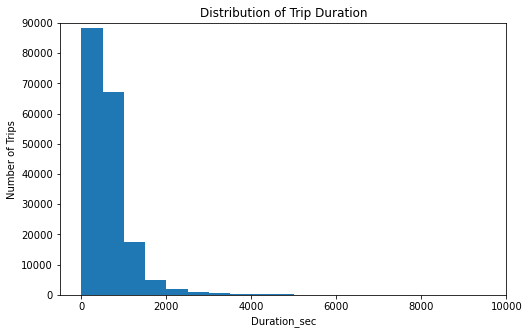

In [12]:
binSize = 500
bins = np.arange(0, df['duration_sec'].max()+binSize, binSize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

C:\Users\hp\AppData\Local\Temp/ipykernel_14376/3782635619.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 15000])


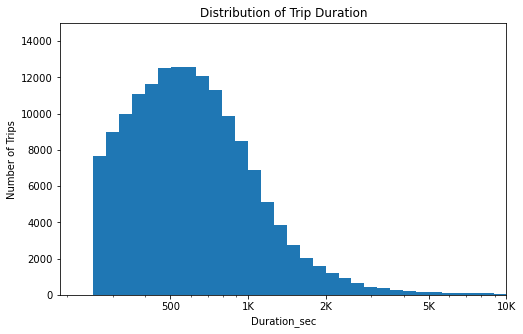

In [14]:
# Putting the distribution in a log scale because of the tail in the distribution

log_binSize = 0.05
bins_log = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+ log_binSize, log_binSize)

plt.figure(figsize = [8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins_log)
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1K','2K','5K', '10K'])
plt.axis([0, 10000, 0, 15000])
plt.show()

In [ ]:
# Trip duration is mostly centered on values which are less than 2000 seconds with peak around 600 seconds
# Number of trips values starts to increase from 600 seconds but starts to decline below 2000 values under 2000 seconds

# Next is the first predictor variable of interest (Start Station and End Station)

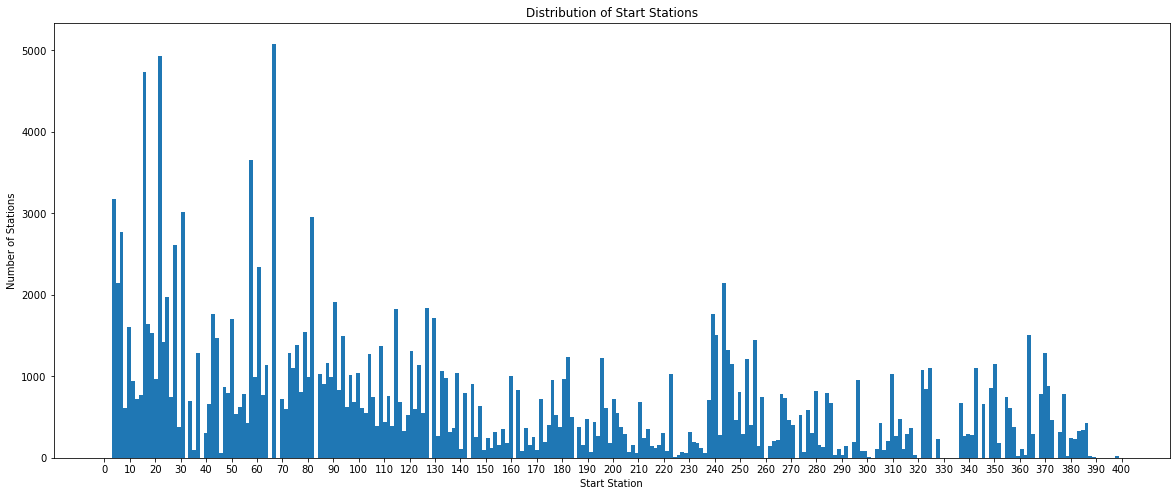

In [15]:
# Plotting start station id distribution on a standard scale

binSize = 1.5
bins = np.arange(0, df['start_station_id'].astype(float).max()+binSize, binSize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 402, 10))
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins)
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.show()

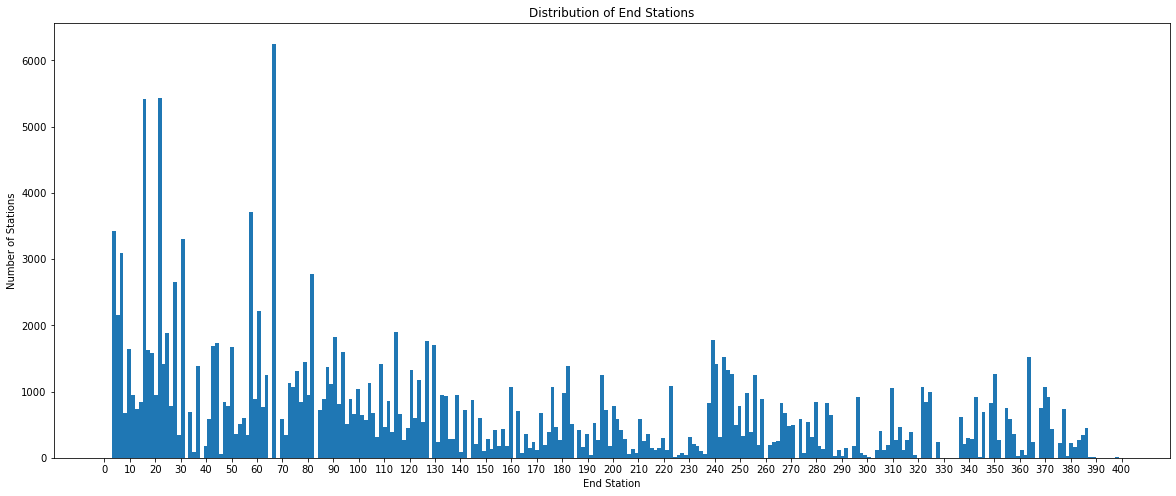

In [16]:
# Plotting end station id distribution.
binSize = 1.5 
bins = np.arange(0, df['end_station_id'].astype(float).max()+binSize, binSize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 402, 10))
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins)
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()

In [ ]:
# In the case of start and end station, the start station and end station are the same as you tell
# from the the diagram.

# Looking at other variable in the data set, age, user type. and gender


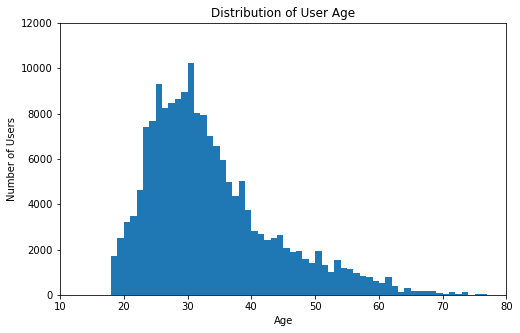

In [19]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

In [ ]:
# You can see that the distribution is more concentrated between 20 and 40 years old.

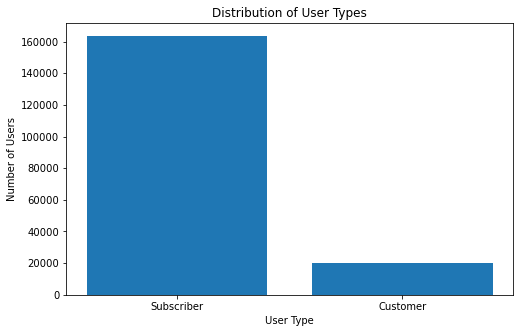

In [20]:
#Plotting types of users
plt.figure(figsize=[8, 5])
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts() )
plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

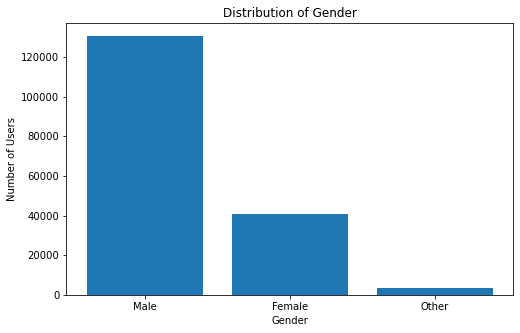

In [21]:
# Plotting genders
plt.figure(figsize=[8, 5])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In [ ]:
# The trip duration takes a large amount of values and is concentrated at 600 seconds peak 
# occurred starting from 0 and then distribution starts to dip and there is no more peak value.

# Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In [ ]:
# When investigating the Birth year variables, Birth year is converted by substracting the year from current year 
# in order to give the distibution for age and better perception. In addtion, start station and end station is
# plotted in a larger plot so that it gives a better insight regarding traffic of bikes at certain stations.



# Bivariate Exploration

In [ ]:
# I want to look at the duration in seconds correlations present between features such as:
# age, start station, end station, user type, and gende in the data.

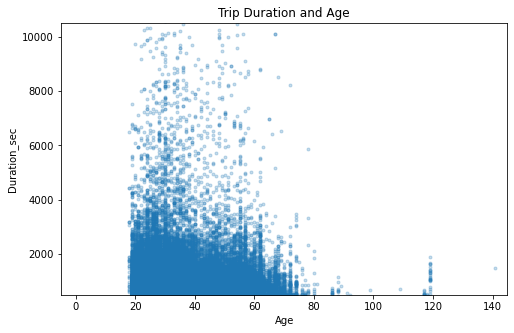

In [24]:
plt.figure(figsize=[8, 5])
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.')
plt.axis([-5, 145, 500, 10500])
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

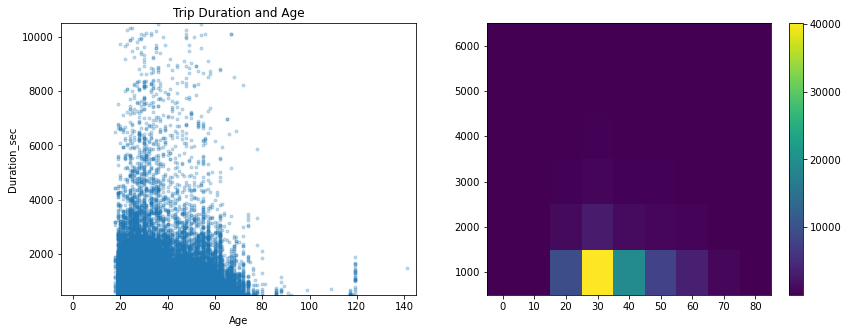

In [27]:
# I will crop the values as the durations are below 6000 and age is below 80


plt.figure(figsize=[14, 5])
plt.subplot(1,2,1)
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.')
plt.axis([-5, 145, 500, 10500])
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')

plt.subplot(1,2,2)
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d((2019 - df['member_birth_year']), df['duration_sec'], bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
plt.show()

In [ ]:
# Looking at this chart above , most frequent users aged between 20 and 45. Duration is registered by younger members.

# Looking into other variables in the dataset to look into duration dependency on start station and end station

In [28]:
sorted(df.start_station_id.unique())

[3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 27.0,
 28.0,
 30.0,
 31.0,
 33.0,
 34.0,
 36.0,
 37.0,
 39.0,
 43.0,
 44.0,
 46.0,
 47.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 55.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 66.0,
 67.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 101.0,
 102.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 125.0,
 126.0,
 127.0,
 129.0,
 130.0,
 131.0,
 133.0,
 134.0,
 136.0,
 137.0,
 139.0,
 140.0,
 141.0,
 144.0,
 148.0,
 149.0,
 150.0,
 151.0,
 154.0,
 155.0,
 156.0,
 158.0,
 159.0,
 160.0,
 163.0,
 166.0,
 171.0,
 172.0,
 174.0,
 176.0,
 180.0,
 181.0,
 182.0,
 183.0,
 186.0,
 190.0,
 193.0,
 194.0,
 195.0,
 196.0,
 197.0,
 198.0,
 202.0,
 207.0

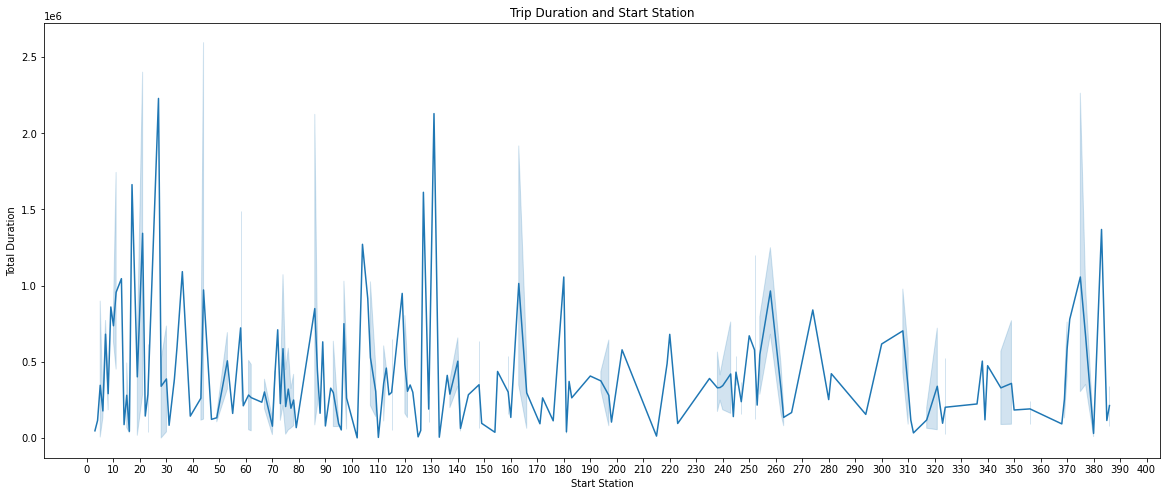

In [31]:
S_s = []
all_start_station_ids = sorted(df.start_station_id.unique())

for x in all_start_station_ids:
    S_s.append(df[df.start_station_id == x].duration_sec.sum())
    total_duration = pd.Series(S_s)

plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
plt.title('Trip Duration and Start Station')
plt.xlabel('Start Station')
plt.ylabel('Total Duration')
plt.show()

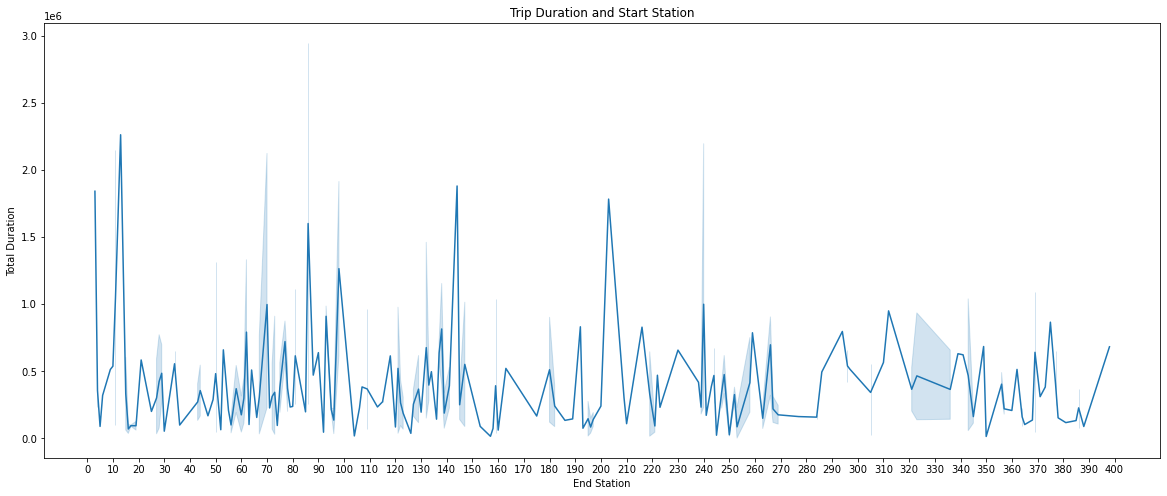

In [32]:
E_e = []
all_end_station_ids =sorted(df.end_station_id.unique())
for x in all_end_station_ids :
    E_e.append(df[df.end_station_id == x].duration_sec.sum())
    total_duration = pd.Series(E_e)
    
plt.figure(figsize = [20, 8])
sb.lineplot(x = df['end_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
plt.title('Trip Duration and Start Station')
plt.xlabel('End Station')
plt.ylabel('Total Duration')
plt.show()

In [ ]:
# From both charts, we can see that trip duration for some station for start station is higher and form stations for end 
# We can see that what stations result in starting of longer tritps and what stations comes end of longer trips

# Let's check duration depency on Gender

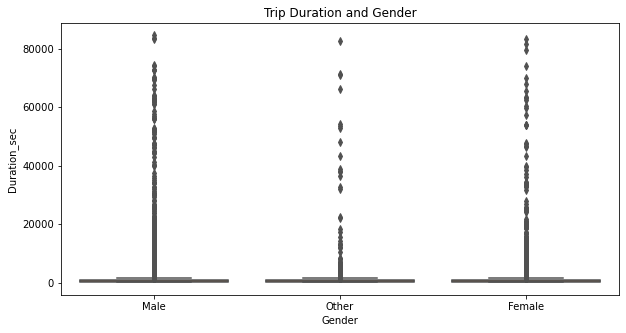

In [34]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_sec')
plt.show()

In [ ]:
# The values are very widespread to see in a box plot
# trimming duration to max 2000 to get clearer chart


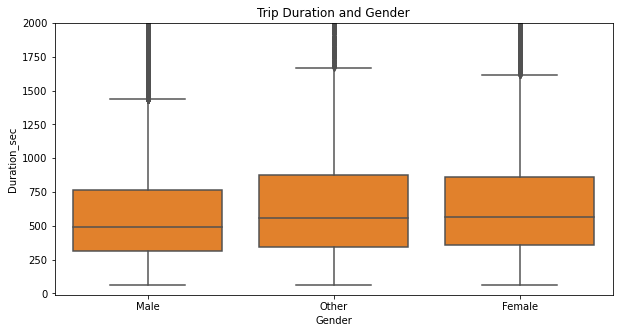

In [35]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_sec')
plt.show()

In [ ]:
# We can see from this chart that, the higher % of females and other Gender rides longer trips than males
# Although number of male riders are very high than other and female 

# Looking at duration dependency on user type

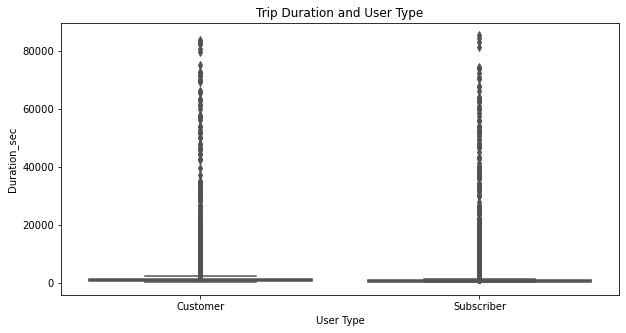

In [37]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()

In [ ]:
# Trimming duration to max 2000 seconds to get clearer view

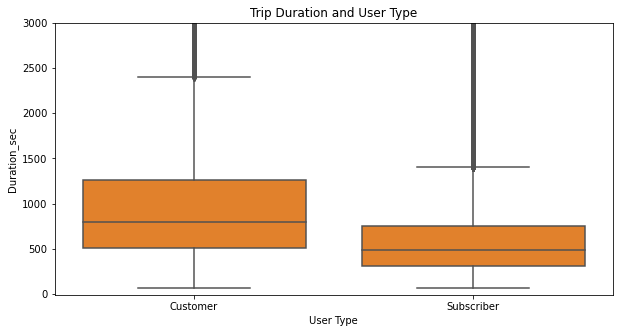

In [38]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()

In [ ]:
# We can see that higher % of customer rided longer trips than subscriber meanwhile ,the number of subscriber riders are very high
# than customer riders


# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In [ ]:
# Trip Duration is so dependendable on the age of the member, when the age between 20 to 45, the trip duration is higher than the older ages.
# However, Start station and end station does not much determine the trip duration. 
# Trip duration for some station for start station is higher and for some stations for end station is higher.
# As a result, we can see that what stations result in starting of longer trips and what stations comes end of longer trips

# Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In [ ]:
# I thought that variables which are user type and gender values having higher value to get higher trip duration 
# but it is the opposite. For gender, value of male members is very high but it got lower trip duration. 
# For user type, value of subscriber members is very high but it got lower trip duration then customer.

# Multivariate Exploration

In [ ]:
# I want to explore how categorical measures of user types and gender into the relationship between trip and duration and age


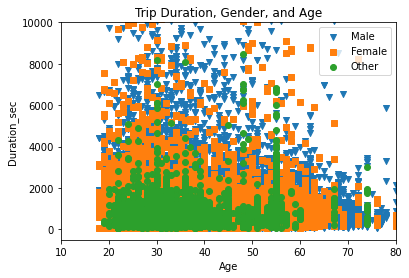

In [44]:
gender_m = [['Male', 'v'], ['Female', 's'], ['Other', 'o']]

for gender, marker, in gender_m:
    df_gender = df[df['member_gender'] == gender]
    plt.scatter((2019 - df_gender['member_birth_year']), df_gender['duration_sec'], marker = marker, alpha= 1)
plt.legend(['Male', 'Female', 'Other'])
plt.axis([10,80, -500, 10000])
plt.title('Trip Duration, Gender, and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

In [ ]:
# Separating all 3 genders into different graphs


C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


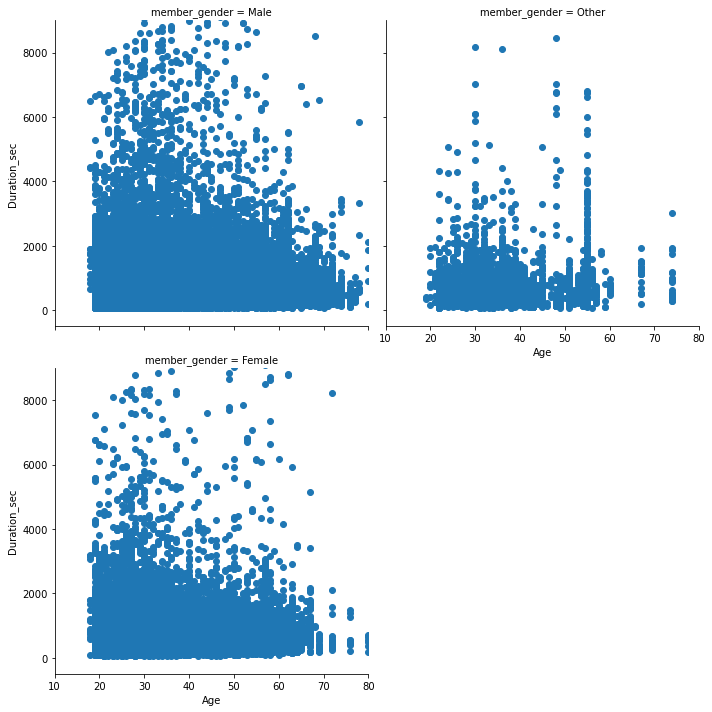

In [45]:
df['age'] = (2019 - df['member_birth_year'])
gender = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, size = 5, 
                     xlim = [10, 80], ylim = [-500, 9000])
gender.map(plt.scatter, 'age', 'duration_sec', alpha=1)

gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')

plt.show()

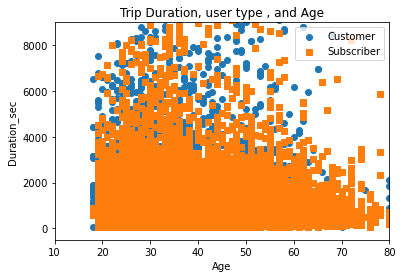

In [46]:
usertype_m = [['Customer', 'o'], ['Subscriber', 's']]

for utype, marker in usertype_m:
    df_utype = df[df["user_type"] == utype]
    plt.scatter((2019 - df_utype['member_birth_year']), df_utype['duration_sec'], marker = marker, alpha=1)

plt.legend(['Customer', 'Subscriber'])
plt.axis([10,80, -500, 9000])
plt.title('Trip Duration, user type , and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


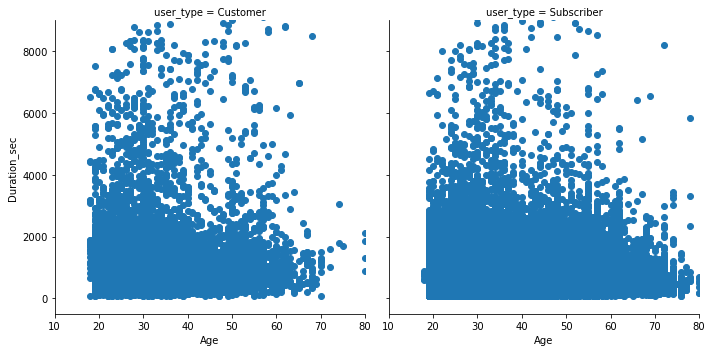

In [47]:
user_type = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
user_type.map(plt.scatter, 'age', 'duration_sec', alpha= 1)

user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_sec')

plt.show()

In [ ]:
# For the age, duration, and gender, for the others leap at an older age (around 60 years) to got 3000 trip duration.

# For the age, duration, and user type, both Customer and Subscriber are showing similar trends for age and trip duration, 
# but for subscribers the trip duration is higher for older age.

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In [ ]:
# I observed that although the number of users for male is higher but percentage is higher for women and other in trip duration. 
# And,for the others leap at an older age (around 60 years) to got 3000 trip duration which is a peak. 
# Also, for subscribers the trip duration is higher than customer for older age.

# Were there any interesting or surprising interactions between features?

In [ ]:
# Looking back on the plots, leaping for other gender at an older is a surprise. 
# And, for subscribers the trip duration is higher than customer for older age is a surprise